In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def parse(text):
    arr = np.array(re.findall("-?\d+", text)).astype(np.int).reshape(-1, 4)
    return pd.DataFrame(arr, columns=["x", "y", "vx", "vy"]).astype(np.int)

def step(df, i):
    return df[["x", "y"]] + i * df[["vx", "vy"]].values

def plot(df, i=0):
    df = step(df, i)
    fig, ax = plt.subplots(figsize=(6, 5))
    matrix = df.pivot_table(index="y", columns="x", aggfunc=lambda x: 1).fillna(0).astype(np.bool).values
    ax.matshow(matrix, cmap="bone_r")
    plt.show()
    plt.show()
    
def pixel_area(df, i=0):
    position = step(df, i)
    area = (position.max(axis=0) - position.min(axis=0)).sum()
    return area

def search_frames(df, n_max=20000):
    areas = []
    for i in tqdm(range(n_max)):
        positions = step(df, i)
        area = pixel_area(df, i)
        areas.append(area)
        if i > 2 and areas[-2] < area:
            break
    return np.array(areas)

def process(text, n_max=1000):
    df = parse(text)
    arr = search_frames(df, n_max=n_max)
    seconds = arr.argmin()
    plot(df, i=seconds)
    print("Seconds:", arr.argmin())
    return arr

/home/isaac/miniconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


  0%|          | 0/1000 [00:00<?, ?it/s]


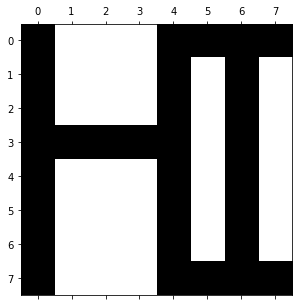

Seconds: 3


array([36, 28, 22, 16, 22])

In [2]:
process("""position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>""")

### Part 1

In [3]:
with open("../inputs/10/input.txt", "r") as fp:
    text = fp.read()
    data = parse(text)

 67%|██████▋   | 9993/15000 [00:50<00:25, 197.11it/s]

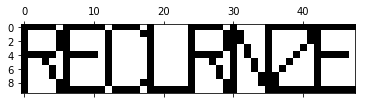

Seconds: 10007
CPU times: user 51.1 s, sys: 553 ms, total: 51.6 s
Wall time: 51.1 s


In [4]:
%%time
arr = process(text, n_max=15000)

### Part 2

In [5]:
print("Part 2:", arr.argmin())

Part 2: 10007
